# HOMEWORK 3

For this homework you are going to implement the **unsharp masking** filter (USM). It is a technique to improve the sharpness of an image by combining the image with its blurred (unsharp) version. See the Wikipedia [page](https://en.wikipedia.org/wiki/Unsharp_masking) for more details.

### Unsharp Masking (USP)
The USM technique consists of the following steps:
* Load the image you will be working with.
* Create a blurred (unsharp) version of the original image.
* Add the unsharp image (with a certain **weight**) to the original.

To sum it up, the USM performs the following operation:

`sharpened = original + (original − unsharp) × amount`

Even though we provide you an image to work with, you are welcome to use your own images :-)

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

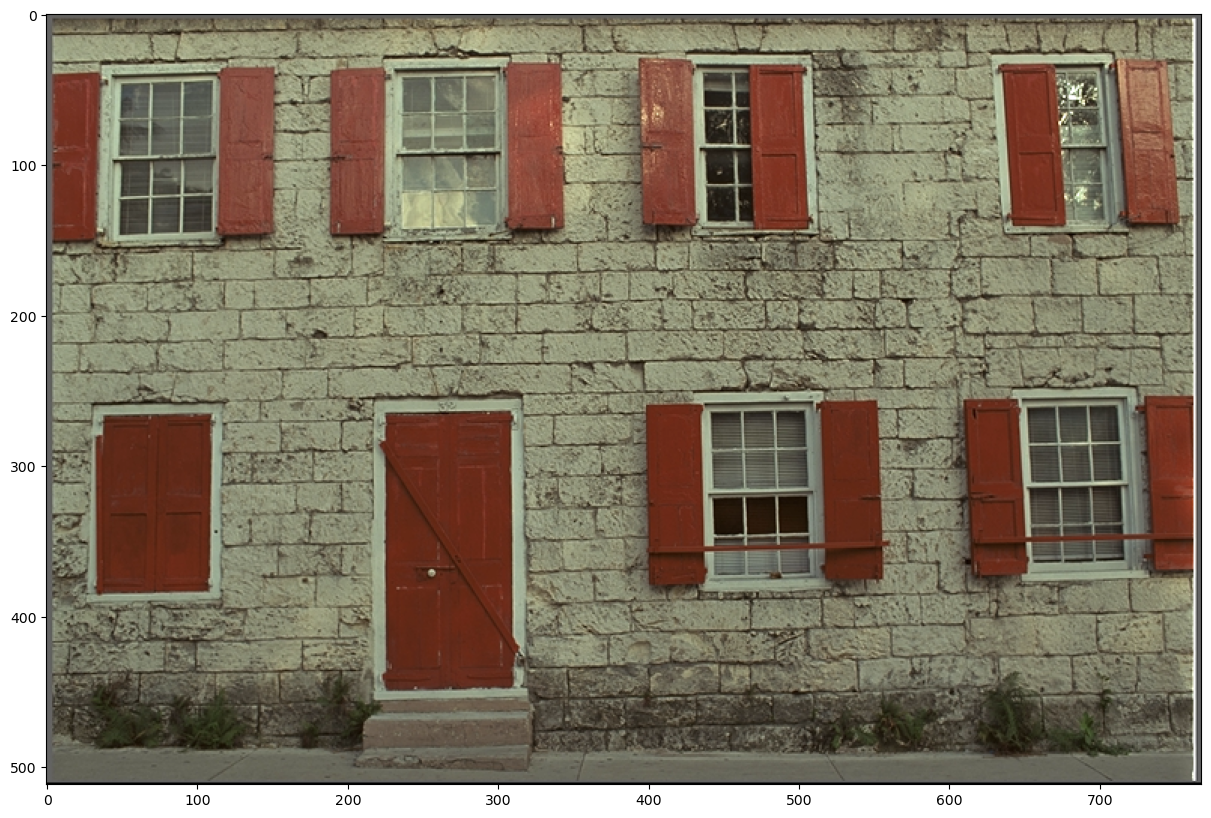

In [8]:
img = cv2.imread('./data/kodim01.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) / 255
plt.imshow(img)

In [51]:
# Create a blurred (unsharp) version of the original image (you can use Gaussian blurring)
unsharp = cv2.GaussianBlur(img, (5,5), 0)

In [50]:
# Create the difference image (original − unsharp)
# Note: Remember that you are working with uint8 data types. Any addition or substractions
# might result in overflow or underflow, respectively. You can prevent this by casting the images to float.
diff = img - unsharp

In [56]:
# Apply USM to get the resulting image using `sharpened = original + (original − unsharp) × amount`
# Note: Again, take care of underflows/overflows if necessary.
sharpened_01 = np.clip(img + diff * 0.1, 0, 1)
sharpened_1 = np.clip(img + diff * 1, 0, 1)
sharpened_2 = np.clip(img + diff * 2, 0, 1)
sharpened_5 = np.clip(img + diff * 5, 0, 1)

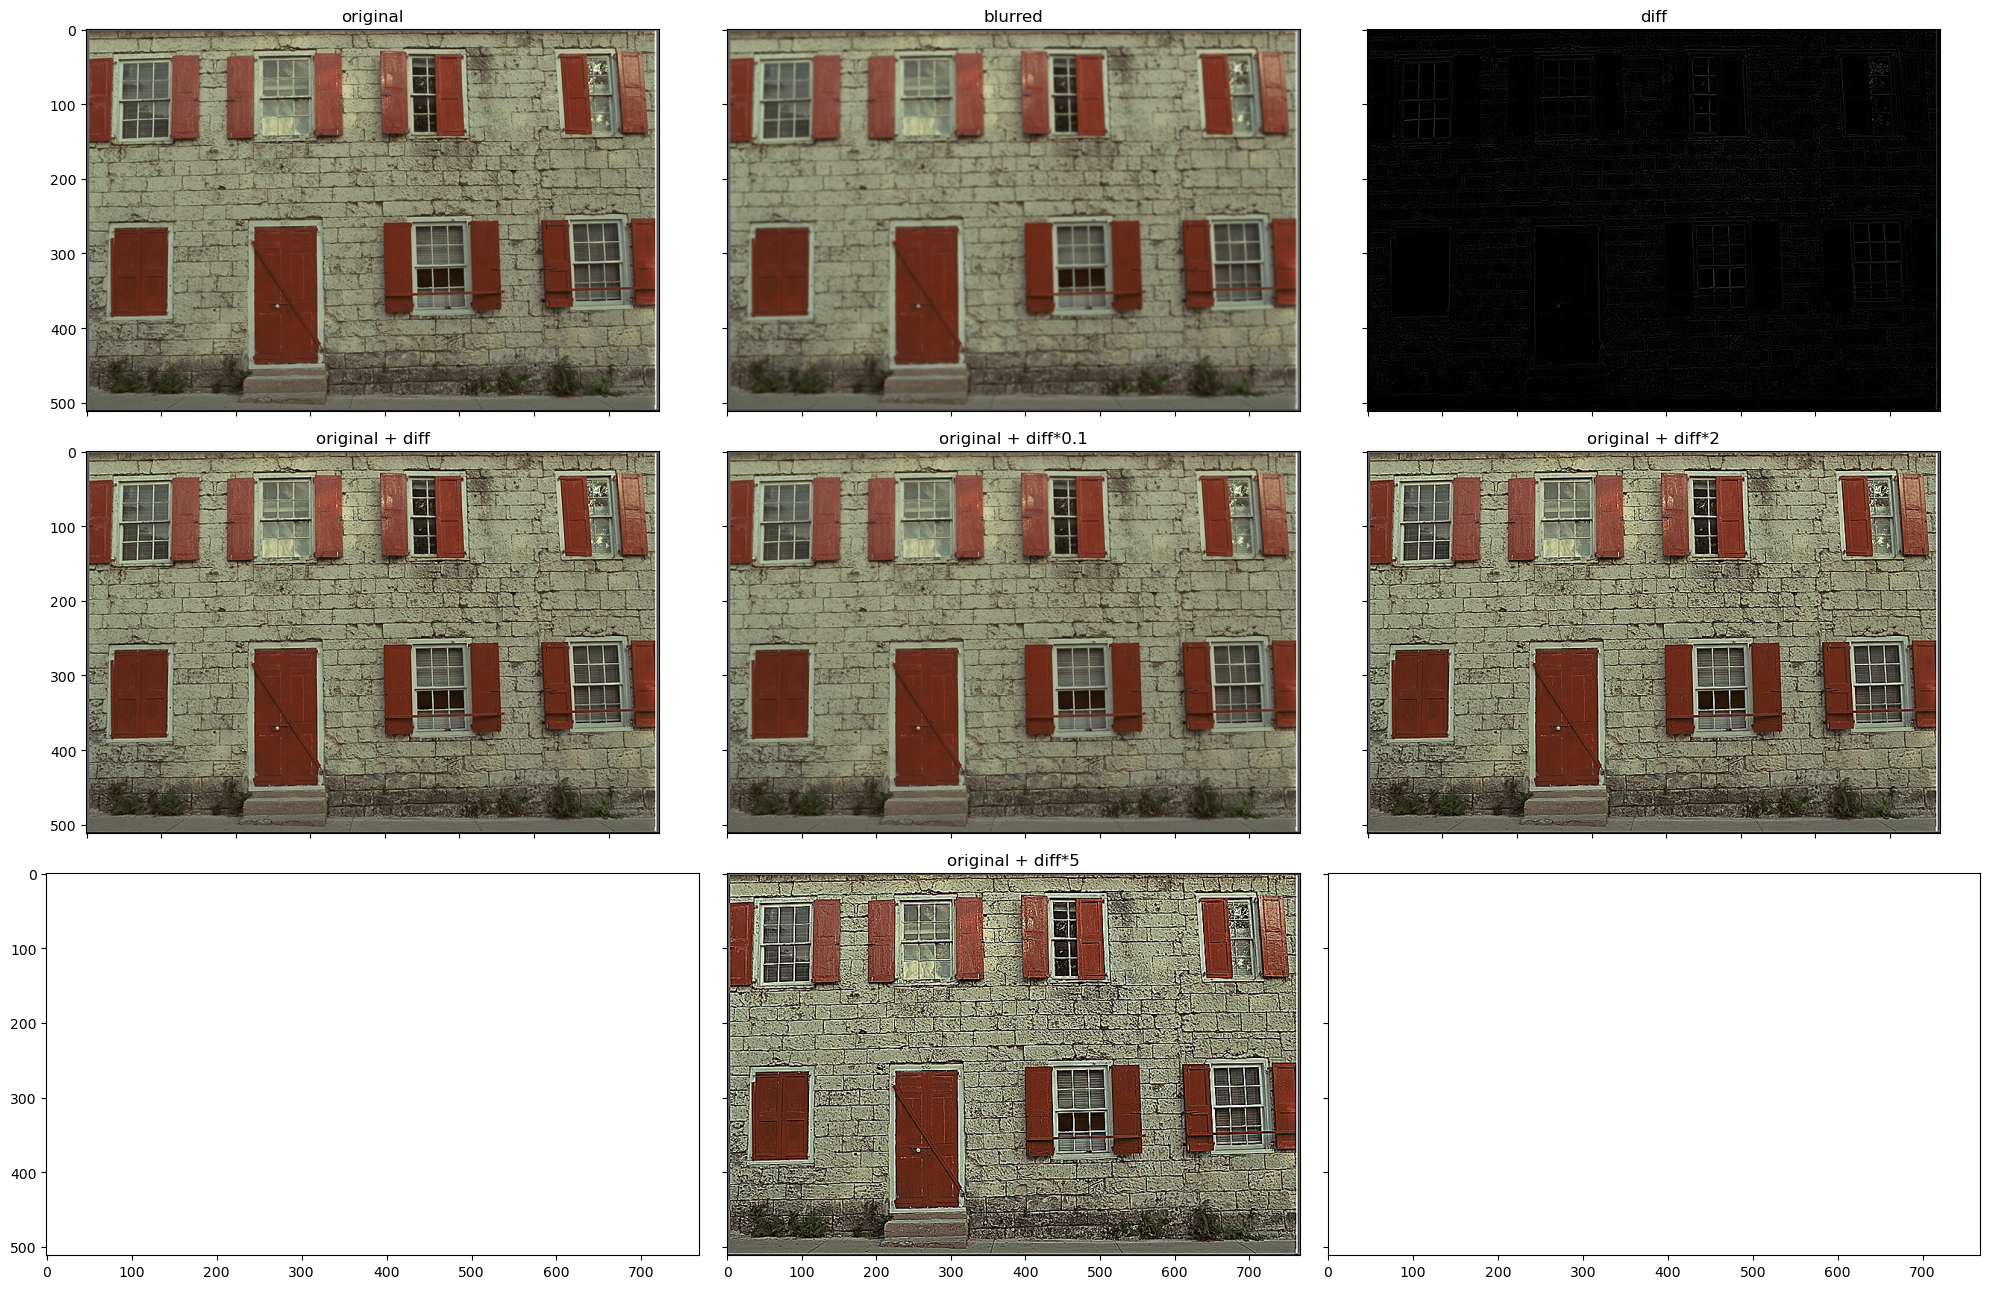

In [76]:
f, axs = plt.subplots(3, 3, figsize=(20, 13), sharex=True, sharey=True, tight_layout=True)
axs[0][0].imshow(img)
axs[0][0].set_title("original")
axs[0][1].imshow(unsharp)
axs[0][1].set_title("blurred")
axs[0][2].imshow(np.clip(diff, 0, 1))
axs[0][2].set_title("diff")
axs[1][0].imshow(np.clip(sharpened_1, 0, 1))
axs[1][0].set_title("original + diff")
axs[1][1].imshow(np.clip(sharpened_01, 0, 1))
axs[1][1].set_title("original + diff*0.1")
axs[1][2].imshow(np.clip(sharpened_2, 0, 1))
axs[1][2].set_title("original + diff*2")
axs[2][1].imshow(np.clip(sharpened_5, 0, 1))
axs[2][1].set_title("original + diff*5");

### Questions
* What is a good (reasonable) value for the `amount` parameter?
 * What happens if it is too small?
 * What happens if it is too large?